<a href="https://colab.research.google.com/github/MarconeRafael/Analise_visual_dados/blob/main/agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Vamos trabalhar com 2 algoritimos  de agrupamento na base de dados Mall Customer Segmentation Data disponívem em: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Primiero vamos importar as ferramentas necessárias para o desenvolvimento

In [ ]:
# pandas para usar dataframes
import pandas as pd
# matplotlib para plotar gráficos
import matplotlib.pyplot as plt
# gdown para baixar os dados
import gdown
# StandardScaler para normalizar os dados
from sklearn.preprocessing import StandardScaler
# numpy para operações numéricas
import numpy as np
# PCA para reduzir a dimensionalidade dos dados
from sklearn.decomposition import PCA
# seaborn para gráficos avançados
import seaborn as sns
# Axes3D para gráficos 3D
from mpl_toolkits.mplot3d import Axes3D


Agora vamos importar a base de dados do meu google drive

In [ ]:
# url da base de dados
url = 'https://drive.google.com/file/d/1U9HvNEKKCJ6UJyMbuj37-pjjqOmkg1hT/view?usp=sharing'
# nome do arquivo que vai ser gerado
output = 'clientes.csv'
# baixa os dados
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1U9HvNEKKCJ6UJyMbuj37-pjjqOmkg1hT
To: /content/clientes.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 7.28MB/s]


'clientes.csv'

Vamos transformar criar nosso dataset a partir do CSV criado anteriormente

In [ ]:
dataset = pd.read_csv('clientes.csv', sep=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Vizualizando as primeiras linhas do Dataframe

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(dataset.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Após uma anlálise do dataset observamos que ele tem um ID, gênero, idade, renda anual e um score de gatos. Decidi remover o CustumerId e o Gender devido entender que não são importantes para a classificação

In [ ]:
dataset = dataset.filter(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Vizualizando dataset após remoções

In [ ]:
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


convertendo para o formato np_array


In [ ]:
dataset_np = dataset.values



Mostando os dados em formato numpy array

In [ ]:
dataset_np

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

#Aplicando algoritimo K-mens

Padronizando dados

In [ ]:
# Padronizar os dados
scaler2 = StandardScaler()
dataset_np = scaler2.fit_transform(dataset_np)


Usando graficos para avaliar qual a melhor quantidade de grupos

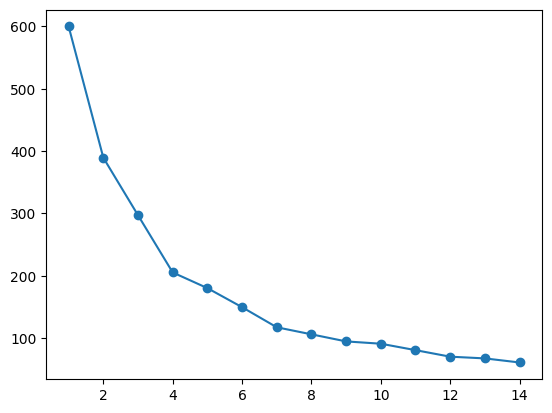

In [ ]:
# importando algoritmo k-means
from sklearn.cluster import KMeans
%matplotlib inline

# quantidade de grupos que vamos realizar os testes
ks = range(1, 15)
# armazena o valor do índice para cada partição gerada
inertias = []
for k in ks:
  # executa o k-means para aquela quantidade de grupos
  km = KMeans(n_clusters=k, random_state=8, n_init='auto')
  # aplica a configuração do agrupamento gerado aos dados para obter o índice
  km.fit(dataset_np)
  # calcula o erro quadrático médio
  inertias.append(km.inertia_)
# plota o gráfico
plt.plot(ks, inertias, marker='o')

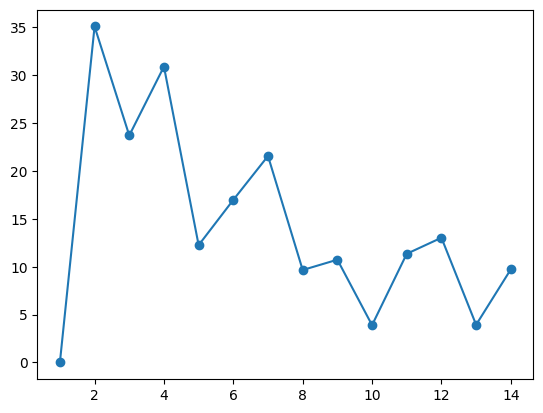

In [ ]:
diff = [(1 - (inertias[i] / inertias[i-1]))*100 if i > 0 else 0 for i in range(0,len(inertias))]
plt.plot(range(1,len(diff)+1), diff, marker='o')

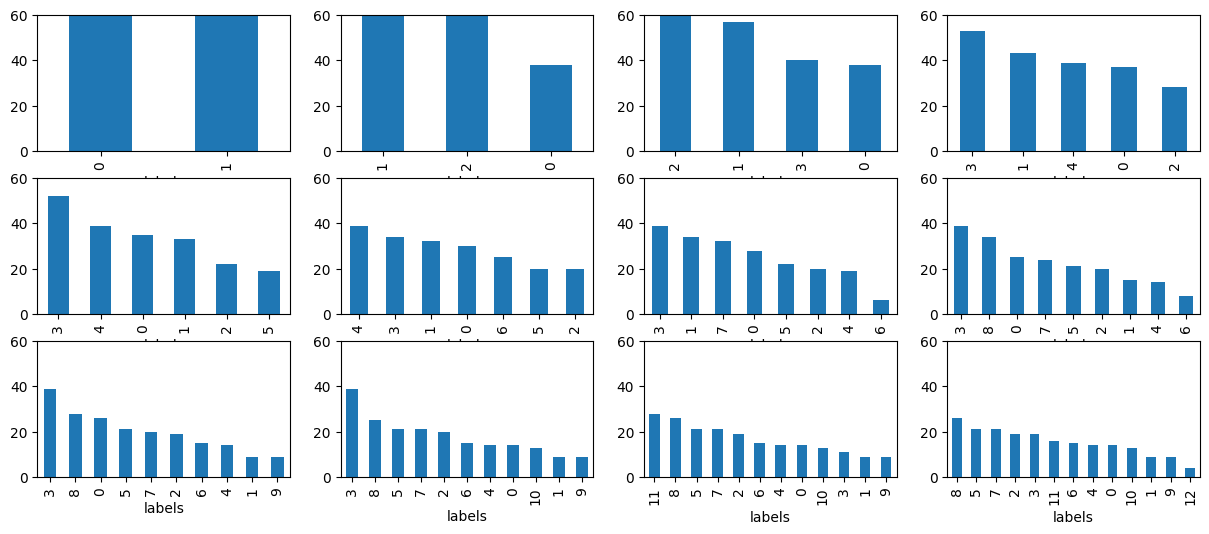

In [ ]:
# configuração do gráfico que vai ser gerado
fig, axs = plt.subplots(3,4, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()

# dataframe para armazenar os dados
df = pd.DataFrame()

# intervalo com a quantidade de grupos que vamos dividir os dados
ks = range(2, 14)
for k in ks:
  # executa o kmeans para cada quantidade de grupos
  km = KMeans(n_clusters=k, random_state=8, n_init='auto')
  # relaciona o resultado gerado com os dados da base
  km.fit(dataset_np)
  # resgata os rótulos (grupos) para cada objeto da base
  labels = km.labels_.tolist()
  # cria um dataframe para facilitar a contagem dos objetos em cada grupo
  df['labels'] = labels
  # plota a quantidade de objetos em cada grupo
  df['labels'].value_counts().plot(kind='bar',ax=axs[k-2],ylim=(0,60))

Analizando os gráficos a cima percebo uma que k maior que 7 não gera quedas significativas no erro. Portanto escolhi trabalhar com 7 grupos.

In [ ]:
# executando k-means com dois grupos
km = KMeans(n_clusters=7, random_state=0)
km.fit(dataset_np)
# obtendo os dois centroides
centers = km.cluster_centers_
# imprimindo os valores dos centroides

print("Centroides:\n")
print(centers)
rotulos = km.fit_predict(dataset_np)
print("\nRotulos:\n")
print(rotulos)


Centroides:

[[ 0.61233873 -0.14037369 -0.12080356]
 [-1.03882283 -0.14065435 -0.08904695]
 [ 0.20522958  1.12001418 -1.33646354]
 [-0.44191719  0.99158305  1.23950275]
 [ 0.47007182 -1.33249477 -1.2287024 ]
 [-0.97602698 -1.32549704  1.0371827 ]
 [ 1.86593393 -0.28283547 -0.01358755]]

Rotulos:

[5 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 6 5 0 5 4 5 0 1 1 1 0 1 1 6 0 0 0 6 1 0 6 1 6 0 6 1 0 6 1 1 6 0 6 6
 6 1 0 0 1 0 6 0 6 0 1 0 0 1 1 0 6 1 0 0 1 1 0 1 0 1 1 0 6 1 0 1 6 0 6 6 6
 1 0 1 1 1 6 0 0 0 1 0 0 3 1 3 0 3 2 3 2 3 1 3 2 3 2 3 1 3 2 3 1 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:

# Arredondando os valores das features e representando como inteiro para facilitar a visualização
centroids = pd.DataFrame(centers.round().astype(int))

# Imprimindo os títulos das colunas
centroids.columns = dataset.keys().values



```
# This is formatted as code
```

Gráfico 3D dos Dados com Matplotlib

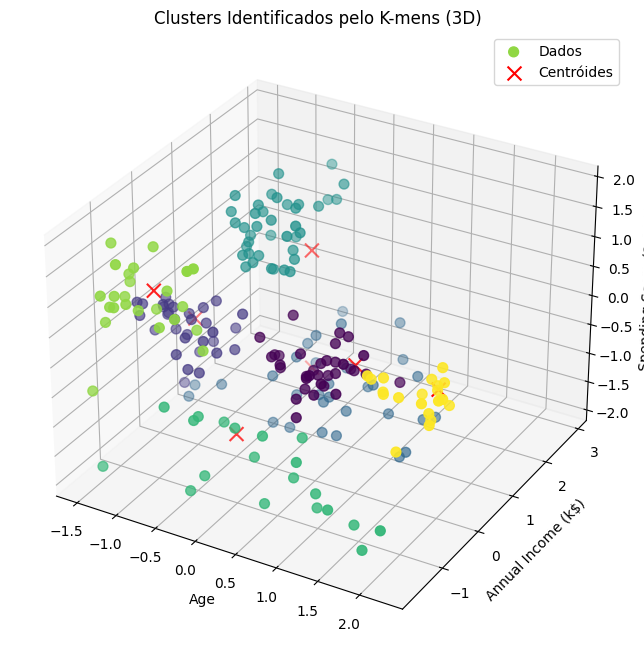

In [ ]:
# Criar DataFrame para os dados e centróides
df_clusters = pd.DataFrame(dataset_np, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_clusters['Cluster'] = rotulos



# Criar a figura e o eixo 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar os dados
scatter = ax.scatter(df_clusters['Age'], df_clusters['Annual Income (k$)'], df_clusters['Spending Score (1-100)'],
                     c=df_clusters['Cluster'], cmap='viridis', s=50, label='Dados')

# Plotar os centróides
ax.scatter(centroids['Age'], centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'],
           c='red', s=100, marker='x', label='Centróides')

# Adicionar título e legendas
ax.set_title('Clusters Identificados pelo K-mens (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

plt.show()


Pairplot com Seaborn

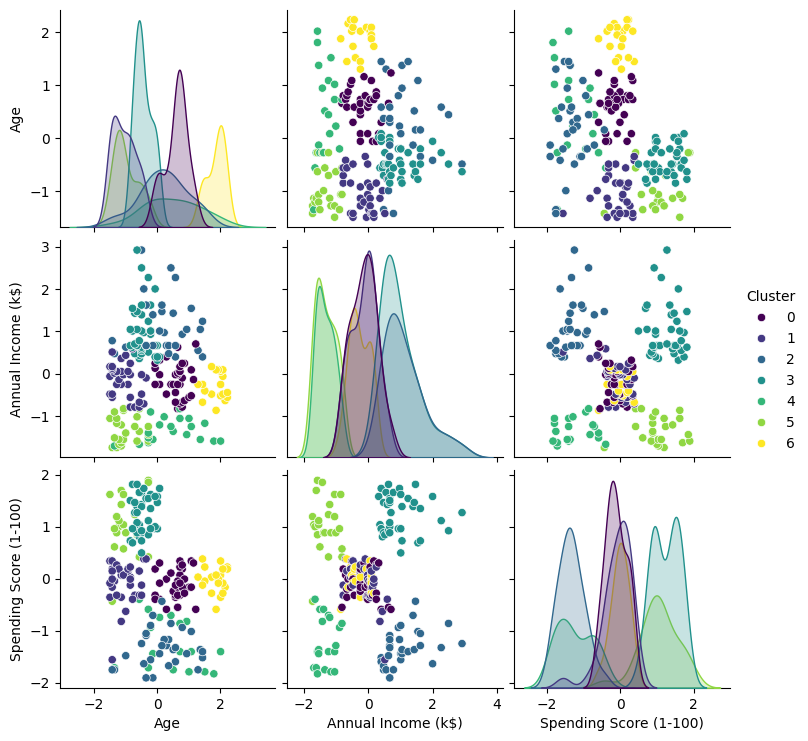

In [ ]:


# Adicionar rótulos dos clusters ao DataFrame
df_clusters = pd.DataFrame(dataset_np, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_clusters['Cluster'] = rotulos

# Criar pairplot para visualizar combinações de características
sns.pairplot(df_clusters, hue='Cluster', palette='viridis')
plt.show()


 Visualização 2D com PCA

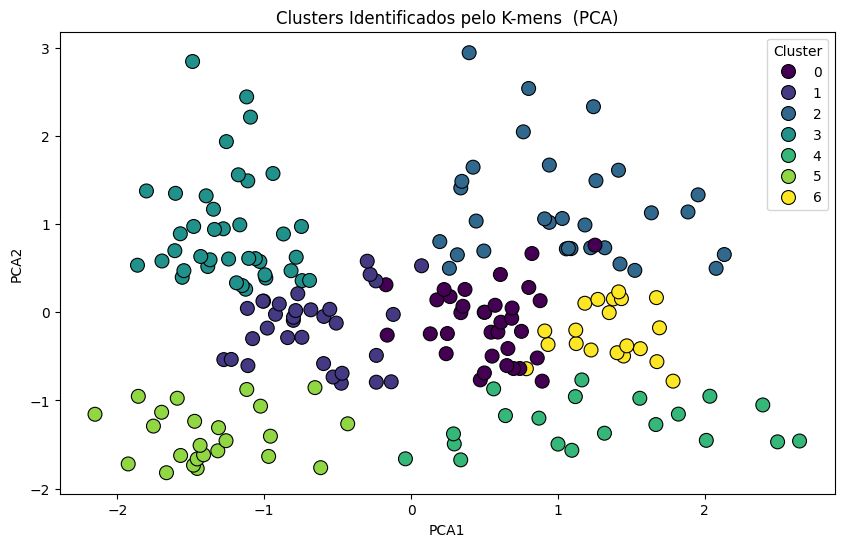

In [ ]:


# Aplicar PCA para reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
dataset_np_pca = pca.fit_transform(dataset_np)

# Criar DataFrame com os dados PCA e rótulos dos clusters
df_pca = pd.DataFrame(dataset_np_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = rotulos

# Criar gráfico de dispersão com os dados PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')
plt.title('Clusters Identificados pelo K-mens  (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


Criando novo dataframe com resultado do agrupamento adicionado:

---



In [ ]:
print("\n \n")
# Adiciona uma coluna com os grupos
dataset_kmnens = dataset.copy()
dataset_kmnens['cluster'] = rotulos

# Mostra a distribuição da quantidade de filmes por grupo
print(dataset_kmnens['cluster'].value_counts())


 

cluster
3    39
0    34
1    32
2    31
5    24
4    20
6    20
Name: count, dtype: int64


Vendo um cliente de cada grupo

In [ ]:
sampled_df = dataset_kmnens.groupby('cluster').head(1)
print(sampled_df)

     Age  Annual Income (k$)  Spending Score (1-100)  cluster
0     19                  15                      39        5
2     20                  16                       6        4
40    65                  38                      35        6
42    48                  39                      36        0
47    27                  40                      47        1
123   39                  69                      91        3
128   59                  71                      11        2


Mostando primeiras linhas do novo dataframe

In [ ]:
dataset_kmnens.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,5
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


Mostando ultimas linhas do novo dataframe

> Add blockquote



In [ ]:
dataset_kmnens.tail()

,Age,Annual Income (k$),Spending Score (1-100),cluster
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2
199,30,137,83,3


Como seria se fosse necessário devolver um CSV com a lista de clientes agrupados

In [ ]:
# Carregar o DataFrame
#dataset_kmnens.to_csv('clientes_agrupados_k_mens.csv', sep=';', index=False)

#Agglomerative Clustering


 Padronizar os dados

In [ ]:

# Padronizar os dados
scaler2 = StandardScaler()
dataset_np_scaled2 = scaler2.fit_transform(dataset_np)


Criando gráficos para escolher o número de grupos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

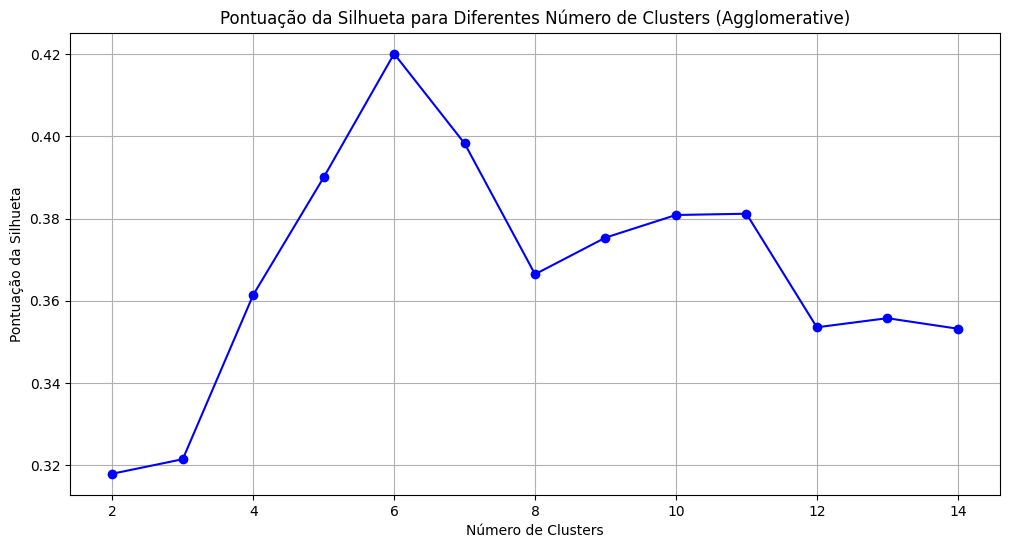

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Quantidade de grupos para testar
ks2 = range(2, 15)  # Começar em 2, pois não faz sentido avaliar k=1 para clustering
# Armazena a pontuação da silhueta para cada número de clusters
silhouette_scores = []

for k in ks2:
    # Executa o agglomerative clustering com o número de clusters k
    agglomerative = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    # Aplica o modelo aos dados
    clusters = agglomerative.fit_predict(dataset_np)
    # Calcula a pontuação da silhueta
    if len(set(clusters)) > 1:  # Silhueta não é definida para apenas um cluster
        score = silhouette_score(dataset_np, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Pontuação de silhueta inválida para apenas um cluster

# Plota o gráfico da pontuação da silhueta em função do número de clusters
plt.figure(figsize=(12, 6))
plt.plot(ks2, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Pontuação da Silhueta para Diferentes Número de Clusters (Agglomerative)')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.grid(True)
plt.show()


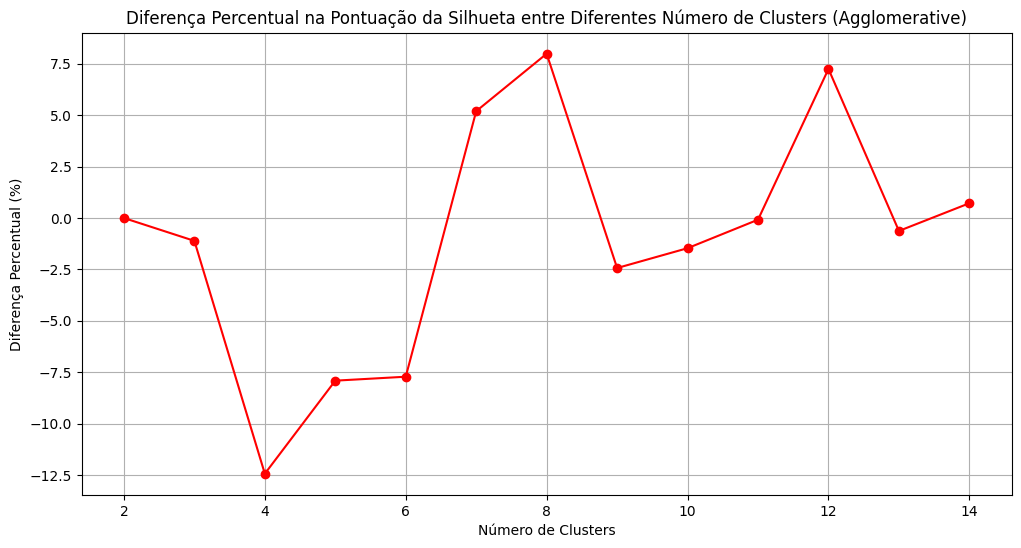

In [ ]:
# Calcula a diferença percentual entre pontuações consecutivas
diff = [(1 - (silhouette_scores[i] / silhouette_scores[i-1])) * 100 if i > 0 else 0 for i in range(len(silhouette_scores))]

# Plota o gráfico da diferença percentual
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(diff) + 2), diff, marker='o', linestyle='-', color='r')
plt.title('Diferença Percentual na Pontuação da Silhueta entre Diferentes Número de Clusters (Agglomerative)')
plt.xlabel('Número de Clusters')
plt.ylabel('Diferença Percentual (%)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

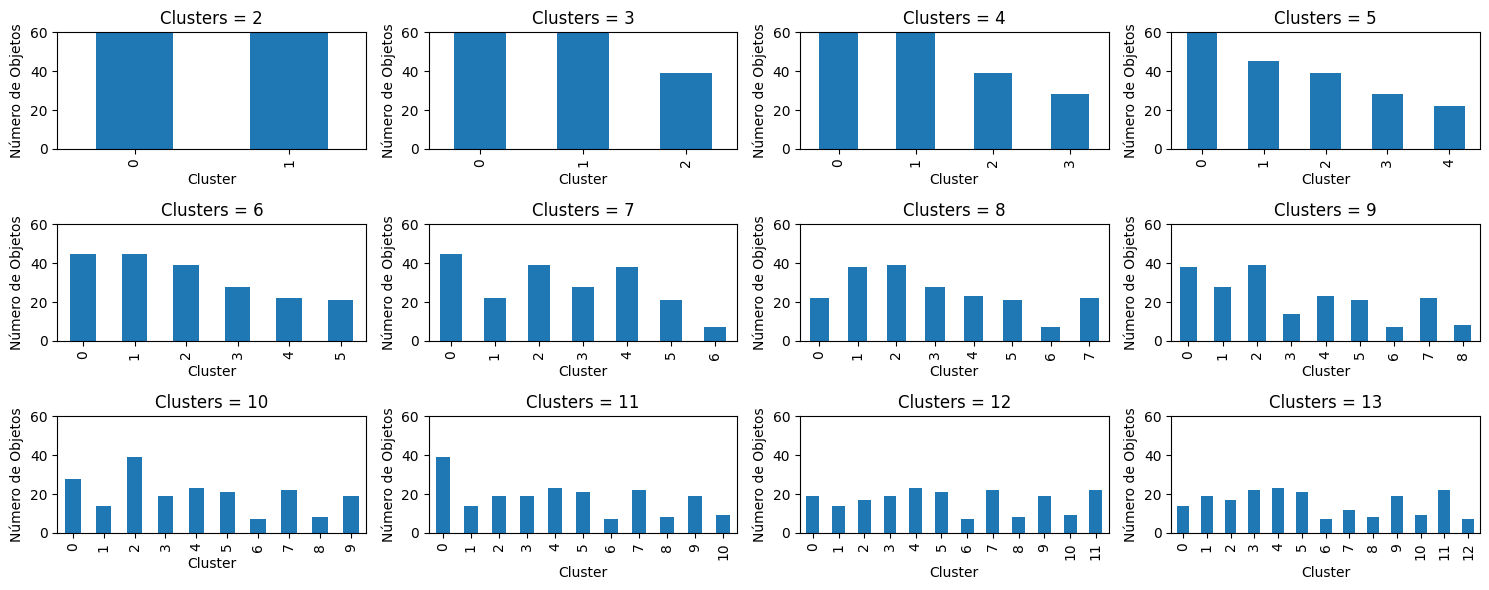

In [ ]:
# Configuração do gráfico com múltiplos subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()  # Achata a matriz de eixos para acesso mais fácil

# DataFrame para armazenar os dados
df = pd.DataFrame()

# Intervalo com a quantidade de grupos para testar
ks2 = range(2, 14)  # Começar em 2, pois não faz sentido avaliar k=1 para clustering
for k in ks2:
    # Executa o agglomerative clustering para a quantidade de grupos k
    agglomerative = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    # Aplica o modelo aos dados e obtém os rótulos
    labels = agglomerative.fit_predict(dataset_np)

    # Adiciona os rótulos ao DataFrame
    df['labels'] = labels

    # Plota a quantidade de objetos em cada grupo
    df['labels'].value_counts().sort_index().plot(kind='bar', ax=axs[k-2], ylim=(0, 60))
    axs[k-2].set_title(f'Clusters = {k}')
    axs[k-2].set_xlabel('Cluster')
    axs[k-2].set_ylabel('Número de Objetos')

# Ajusta o layout do gráfico
plt.tight_layout()
plt.show()


Analizando os gráficos a cima escolhi trabalhar com 6 grupos.

Aplicar Agglomerative Clustering

In [ ]:
# Definir o número de clusters
num_clusters = 6

# Criar o modelo Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')

# Ajustar o modelo aos dados
clusters2 = agglomerative.fit_predict(dataset_np_scaled2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Criar um DataFrame com os dados e os rótulos dos clusters
df_clusters2 = pd.DataFrame(dataset_np_scaled2, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_clusters['Cluster'] = clusters2

# Exibir as primeiras linhas
print(df_clusters.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0 -1.424569           -1.738999               -0.434801        4
1 -1.281035           -1.738999                1.195704        5
2 -1.352802           -1.700830               -1.715913        4
3 -1.137502           -1.700830                1.040418        5
4 -0.563369           -1.662660               -0.395980        4


Visualização em 3D com Matplotlib

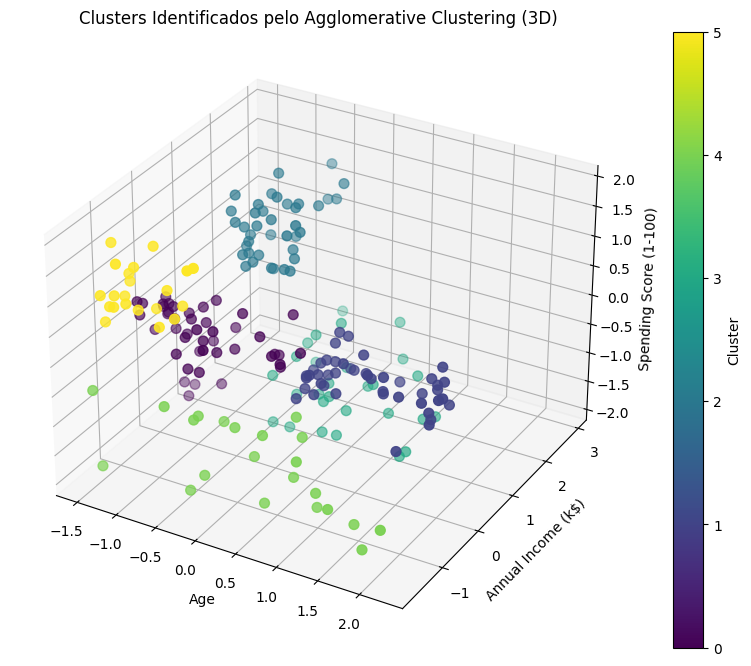

In [ ]:
# Criar uma figura e um eixo 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos com base nas características e cores dos clusters
scatter2 = ax.scatter(df_clusters['Age'], df_clusters['Annual Income (k$)'], df_clusters['Spending Score (1-100)'],
                     c=df_clusters['Cluster'], cmap='viridis', s=50)

# Adicionar título e rótulos aos eixos
ax.set_title('Clusters Identificados pelo Agglomerative Clustering (3D)')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Adicionar uma barra de cores
cbar2 = plt.colorbar(scatter2)
cbar2.set_label('Cluster')

plt.show()


 Visualização de Pairs com Seaborn

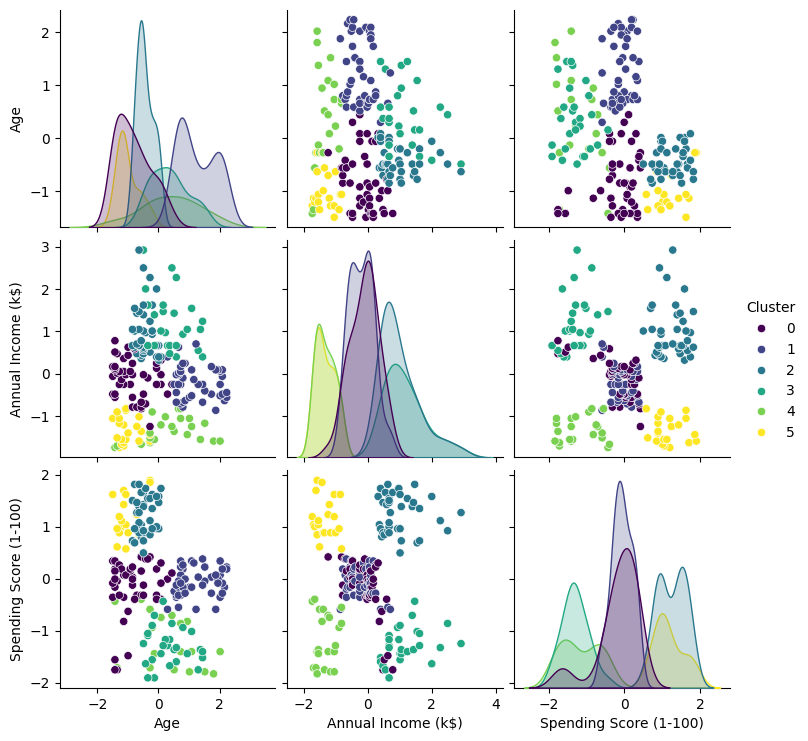

In [ ]:

# Adicionar rótulos dos clusters ao DataFrame original
df_clusters2 = pd.DataFrame(dataset_np_scaled2, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_clusters2['Cluster'] = clusters2

# Criar pairplot para visualizar combinações de características com clusters
sns.pairplot(df_clusters2, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()


 Visualização 2D com Projeção de PCA

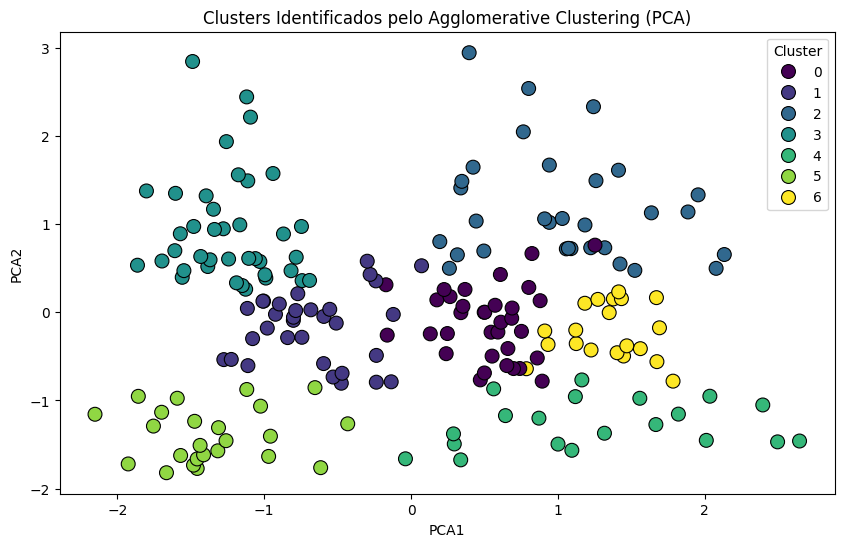

In [ ]:
# Aplicar PCA para reduzir a dimensionalidade para 2D
pca2 = PCA(n_components=2)
dataset_np_pca2 = pca.fit_transform(dataset_np_scaled2)

# Adicionar os dados PCA e os rótulos dos clusters ao DataFrame
df_pca2 = pd.DataFrame(dataset_np_pca2, columns=['PCA1', 'PCA2'])
df_pca2['Cluster'] = clusters2

# Criar gráfico de dispersão com os dados PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')

# Adicionar título e legendas
plt.title('Clusters Identificados pelo Agglomerative Clustering (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


Criando novo dataframe com resultado do agrupamento adicionado:


In [ ]:
print("\n \n")
# Adiciona uma coluna com os grupos
dataset_Agglomerative = dataset.copy()
dataset_Agglomerative['cluster'] = clusters2

# Mostra a distribuição da quantidade de filmes por grupo
print(dataset_Agglomerative['cluster'].value_counts())


 

cluster
0    45
1    45
2    39
3    28
4    22
5    21
Name: count, dtype: int64


Vendo um cliente de cada grupo

In [ ]:
sampled_df = dataset_Agglomerative.groupby('cluster').head(1)
print(sampled_df)

     Age  Annual Income (k$)  Spending Score (1-100)  cluster
0     19                  15                      39        4
1     21                  15                      81        5
27    35                  28                      61        0
40    65                  38                      35        1
123   39                  69                      91        2
128   59                  71                      11        3


Mostando ultimas primeiras do novo dataframe


In [ ]:
dataset_Agglomerative.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


Mostando ultimas linhas do novo dataframe


In [ ]:
dataset_Agglomerative.tail()

,Age,Annual Income (k$),Spending Score (1-100),cluster
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3
199,30,137,83,2


Como seria se fosse necessário devolver um CSV com a lista de clientes agrupados

In [ ]:
# Carregar o DataFrame
#dataset_Agglomerative.to_csv('clientes_agrupados_Agglomerative.csv', sep=';', index=False)

##Validação

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
def print_scores(labels, X):
    silhouette_avg = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)

    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Calinski-Harabasz Score: {ch_score}')
    print(f'Davies-Bouldin Score: {db_score}')

# Supondo que `rotulos` e `X` já estão definidos anteriormente para K-means
print("K-means Validation Scores:")
print_scores(rotulos, dataset_np)

# Validar os resultados do Agglomerative Clustering
print("\nAgglomerative Clustering Validation Scores:")
print_scores(clusters2, dataset_np_scaled2)


K-means Validation Scores:
Silhouette Score: 0.417231894954916
Calinski-Harabasz Score: 132.77430922888286
Davies-Bouldin Score: 0.7934668170964966

Agglomerative Clustering Validation Scores:
Silhouette Score: 0.4201169558789579
Calinski-Harabasz Score: 127.9864543395689
Davies-Bouldin Score: 0.8521020845733145


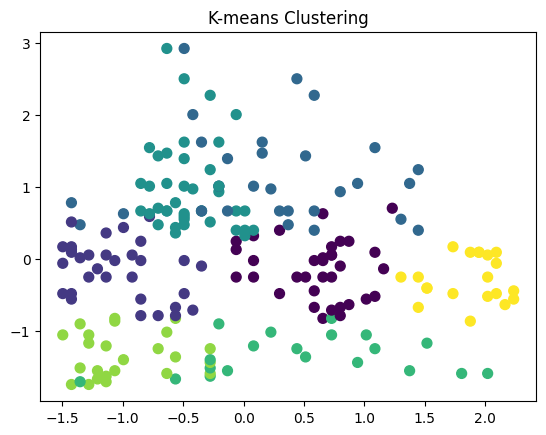

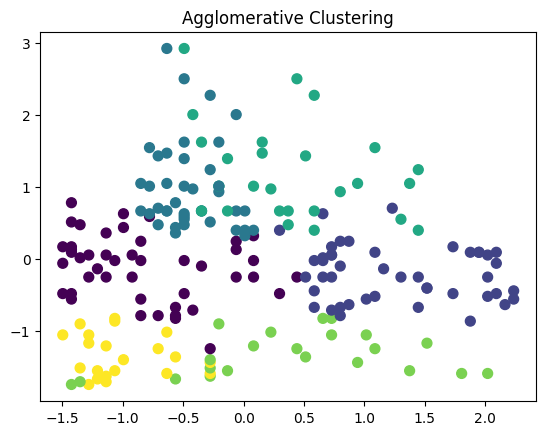

In [ ]:
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

plot_clusters(dataset_np, rotulos, "K-means Clustering")
plot_clusters(dataset_np_scaled2, clusters2, "Agglomerative Clustering")
